In [118]:
import numpy as np
import matplotlib.pyplot as plt

def make_clusters(
        n: int = 500, 
        m: int = 2, 
        k: int = 3, 
        bounds: tuple = (-10, 10),
        scale: float = 1,
        seed: int = 42) -> (np.ndarray, np.ndarray):
    """
    creates some clustered data

    inputs:
        n: int
            number of observations
        m: int
            number of features
        k: int
            number of clusters
        bounds: tuple
            minimum and maximum bounds for cluster grid
        scale: float
            standard deviation of normal distribution
        seed: int
            random seed

    outputs:
        (np.ndarray, np.ndarray)
            returns a 2D matrix of `n` observations and `m` features that are clustered into `k` groups
            returns a 1D array of `n` size that defines the cluster origin for each observation
    """
    np.random.seed(seed)
    assert k <= n

    labels = np.sort(np.random.randint(0, k, size=n))
    centers = np.random.uniform(bounds[0], bounds[1], size=(k,m))
    mat = np.vstack([
        np.random.normal(
            loc=centers[idx], 
            scale=scale, 
            size=(np.sum(labels==idx), m))
        for idx in np.arange(0, k)])

    return mat, labels


def plot_clusters(
        mat: np.ndarray, 
        labels: np.ndarray, 
        filename: str =None):
    """
    inputs:
        mat: np.ndarray
            a 2D matrix where each row is an observation and each column is a feature
        labels: np.ndarray
            a 1D array where each value represents an integer cluster that an observation belongs to
        filename: str
            an optional value to save a figure to a file
    """

    plt.figure(figsize=(5,5), dpi=200)
    plt.scatter(
        mat[:,0], 
        mat[:,1], 
        c=labels)

    if filename:
        plt.savefig(filename)
    else:
        plt.show()
    plt.close()

def plot_multipanel(
        mat: np.ndarray,
        truth: np.ndarray,
        pred: np.ndarray,
        score: np.ndarray,
        filename: str = None):
    """
    Plots a multipanel figure visualizing the efficiency of truth, prediction, 
    and silhouette scoring on a provided dataset

    inputs:
        mat: np.ndarray
            a 2D matrix where each row is an observation and each column is a feature
        truth: np.ndarray
            a 1D array where each value represents a true integer cluster that an observation belongs to
        pred: np.ndarray
            a 1D array where each value represents a predicted integer cluster than an observation belongs to
        score: np.ndarray
            a 1D array where each value represents a float for the silhouette score of that observation
        filename: str
            an optional value to save a figure to a file
    """

    fig, axs = plt.subplots(1, 3, figsize=(9,3), dpi=200)
    
    cvars = [truth, pred, score]
    names = ["True Cluster Labels", "Predicted Cluster Labels", "Silhouette Scores"]
    cmaps = [None, None, "seismic"]
    for idx, ax in enumerate(axs):
        sub = ax.scatter(
            mat[:,0],
            mat[:,1],
            c=cvars[idx],
            cmap=cmaps[idx])
        ax.set_title(names[idx])
        if idx == 2:
            plt.colorbar(sub, ax=ax)
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

In [ ]:
# here we are making tightly clustered data by lowering the scale param
t_clusters, t_labels = make_clusters(n= 1000, m=3, scale=1, k=3, bounds=(-25, 25) , seed=42) 

# here we are making loosely clustered data by increasing the scale param
l_clusters, l_labels = make_clusters(scale=2) 

# here we are making many clusters by adjusting the `k` param
m_clusters, m_labels = make_clusters(k=10)

# here we are directly controlling the dimensionality of our data 
#   1000 observations 
#   200 features 
#   3 clusters)
d_clusters, d_labels = make_clusters(n=1000, m=200, k=3)

"""
Cluster Visualization
"""
# show the visualization for some clusters and their associated labels
plot_clusters(t_clusters, t_labels)
plot_clusters(l_clusters, l_labels)
plot_clusters(d_clusters, d_labels)
# show a multipanel visualization of clusters with true labels, predicted labels, and silhouette scores
# you will need to calculate these predicted labels with your kmeans implementation and the scores 
# with your silhouette score implementation
#plot_multipanel(mat=t_clusters, truth=t_labels)

In [179]:
import numpy as np
from numpy.linalg import norm


class Kmeans:

    def __init__(self, K: int, max_iter=300, random_seed=123,):
        self.K = K
        self.max_iter = max_iter
        self.random_seed = random_seed

    def _initialize_centroids(self, X):
        np.random.RandomState(self.random_seed)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.K]]
        return centroids
    
    def _compute_euc_dist(self, X, centroids):
        distance = np.zeros((X.shape[0], self.K))
        for k in range(self.K):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def _closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self._compute_euc_dist(X, old_centroids)
            self.labels = self._closest_cluster(distance)
            self.centroids = self.get_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.get_error(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self._compute_euc_dist(X, self.centroids)
        return self._closest_cluster(distance)
    

    def get_error(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.K):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def get_centroids(self, X, labels):
        centroids = np.zeros((self.K, X.shape[1]))
        for k in range(self.K):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

[[ 4.35475058  2.24032482]
 [-9.76883826  8.78738064]
 [-0.27802687  1.37134979]]
4047.1483025460298


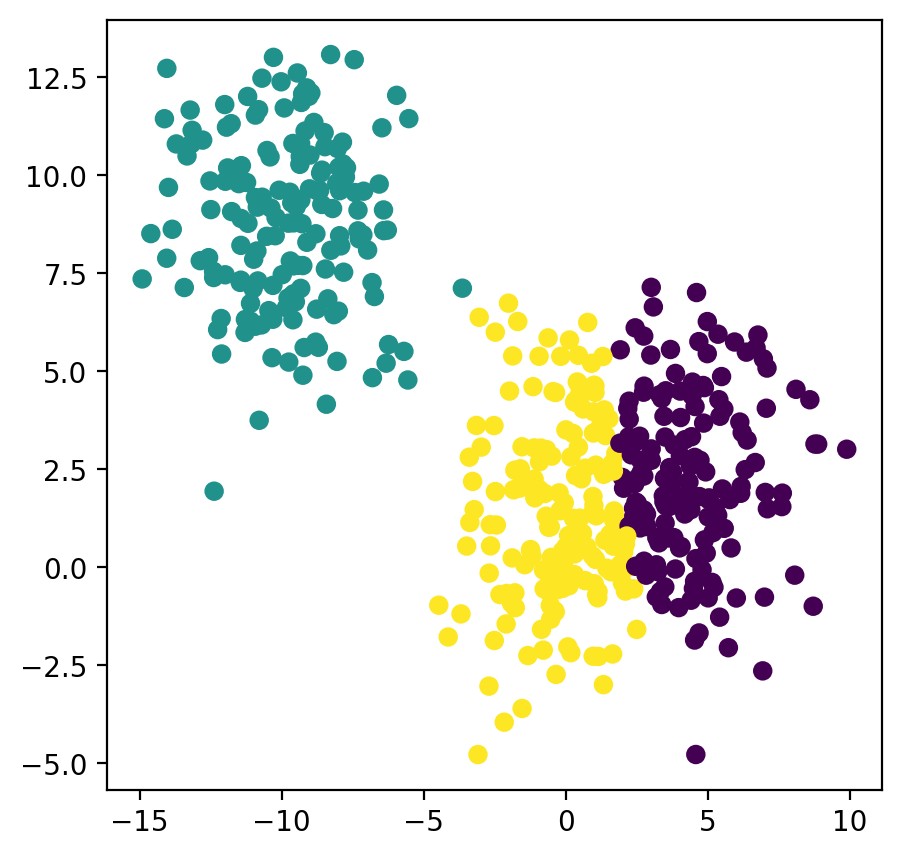

(500,)
()


In [180]:
KM= Kmeans( K=3)
FIT = KM.fit(l_clusters)
LABS = KM.predict(l_clusters)

Centroids= KM.get_centroids(l_clusters, labels=LABS)
print(Centroids)

ERROR= KM.get_error(l_clusters, LABS, Centroids)
print(ERROR)

plot_clusters(l_clusters, LABS)

print(np.shape(LABS))
print(np.shape(FIT))

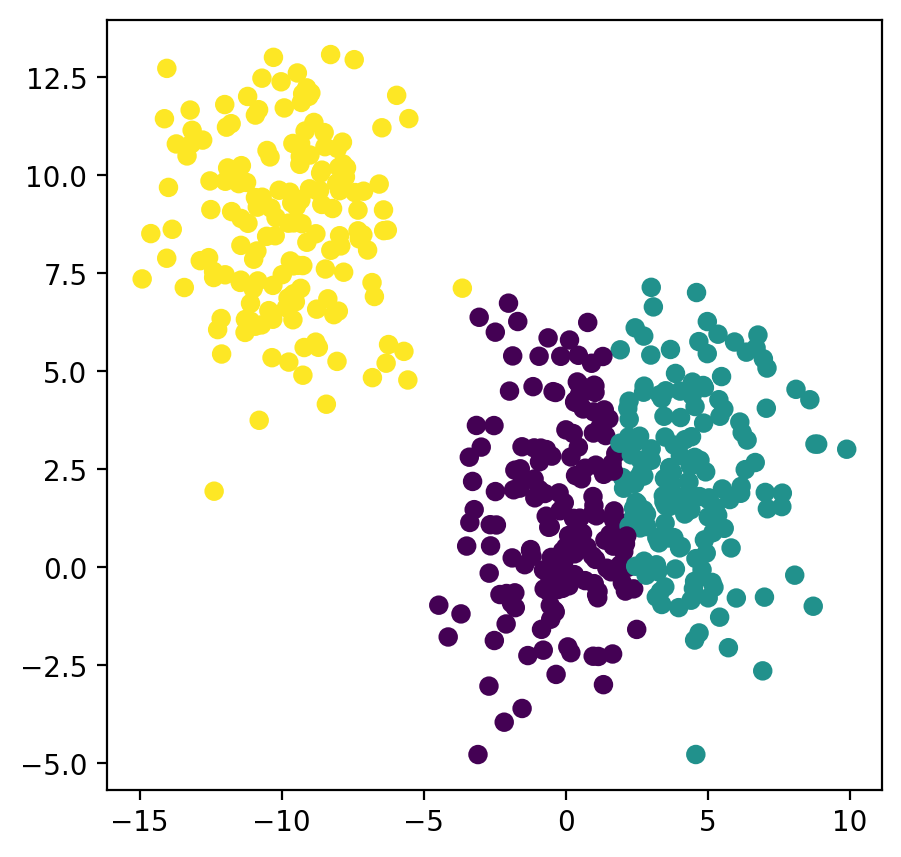

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 

In [182]:
KM = Kmeans(K=3)
fit = KM.fit(l_clusters)
labs = KM.predict(l_clusters)
plot_clusters(l_clusters, labs)
print(labs)
print(l_labels)

In [190]:
class Silhouette:
    def __init__(self):
        """
        inputs:
            none
        """

    def score(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        calculates the silhouette score for each of the observations

        inputs:
            X: np.ndarray
                A 2D matrix where the rows are observations and columns are features.

            y: np.ndarray
                a 1D array representing the cluster labels for each of the observations in `X`

        outputs:
            np.ndarray
                a 1D array with the silhouette scores for each of the observations in `X`
        """
        n_samples = X.shape[0]
        distances = cdist(X, X)
        cluster_sizes = np.bincount(y)
        intra_cluster_distance = np.zeros(n_samples)
        for cluster in range(cluster_sizes.shape[0]):
            mask = y == cluster
            intra_cluster_distance[mask] = np.mean(distances[mask][:, mask], axis=1)
        centroid_distance = np.zeros(n_samples)
        for cluster in range(cluster_sizes.shape[0]):
            mask = y != cluster
            centroid_distance[mask] = np.mean(np.min(distances[mask][:, y == cluster], axis=1))
        scores = (centroid_distance - intra_cluster_distance) / np.maximum(intra_cluster_distance, centroid_distance)
        return scores
    
    def avg_score(self, X, y):
        """
        calculates the average silhouette score for all observations

        inputs:
            X: np.ndarray
                A 2D matrix where the rows are observations and columns are features.

            y: np.ndarray
                a 1D array representing the cluster labels for each of the observations in `X`

        outputs:
            float
                the average silhouette score for all observations
        """
        scores = self.score(X, y)
        avg_score = np.mean(scores)
        return (f"Average silhouette score: {avg_score:.3f}")
       

In [191]:
import numpy as np

# Create KMeans model
kmeans = Kmeans(K=3)

# Fit the model to the data
kmeans.fit(l_clusters)

# Predict the cluster labels for each observation
labels = kmeans.predict(l_clusters)

kmeans = Kmeans(K=4)
kmeans.fit(t_clusters)
labels = kmeans.predict(t_clusters)

# calculate average silhouette score
sil = boogy()
avg_score = sil.avg_score(t_clusters, labels)
print(avg_score)

Average silhouette score: 0.946
